In [164]:
from bs4 import BeautifulSoup
import urllib.request
from tqdm.auto import tqdm
import re
import glob
from collections import Counter
import pandas as pd

In [65]:
from wordcloud import *

## Scrape

In [206]:
url = 'https://www.home-barista.com/coffees/'
post = 'what-is-wow-ing-you-t22185'

In [213]:
f'{url}{post}.html'

'https://www.home-barista.com/coffees/what-is-wow-ing-you-t22185.html'

In [120]:
class AppURLopener(urllib.request.FancyURLopener):
    version = 'Mozilla/5.0'

In [130]:
opener = AppURLopener()
texts = []
MAX_RANGE = 1090
for i in tqdm(range(0, MAX_RANGE, 10)):
    urltoget = f'{url}{post}-{i}.html'
    response = opener.open(urltoget)
    soup = BeautifulSoup(response)
    page_texts = [x.get_text() for x in soup.select('div.content')]
    for x in page_texts:
        texts.append(x)

/home/zach/anaconda3_v2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  """Entry point for launching an IPython kernel.


In [131]:
!rm texts/*
for i,t in enumerate(texts):
    with open(f'texts/{i}.txt', 'w+') as f:
        f.write(t)

## Load from Files

In [10]:
texts = []
for f in glob.glob('texts/*'):
    with open(f, 'r') as f:
        texts.append(f.read())

In [11]:
len(texts)

1090

## Analyze with Spacy

In [12]:
import spacy
from spacy import displacy

In [13]:
nlp = spacy.load("en_core_web_sm")

In [14]:
doc = nlp("\n".join(texts))

### Get companies

In [162]:
companies = []
for ent in doc.ents:
    if ent.label_ in ['ORG', 'PERSON', 'SO ORG', 'FAC']:
        if ent.root.text.lower() == 'coffee':
            companies.append(ent.text.strip("'s"))

In [200]:
cntr = Counter(companies)
companies_df = pd.DataFrame({"Company": list(cntr.keys()), "Mentions": list(cntr.values())})

In [201]:
companies_df

,Company,Mentions
0,Counter Culture Coffee,4
1,Black & White Coffee,2
2,Chocolate Fish Coffee,1
3,Sea Island Coffee,1
4,Issaquah Coffee,3
5,B&W Coffee,1
6,Chromatic Coffee,5
7,Vero's Coffee,1
8,Flying Goat Coffee,2
9,Coffee,1


In [202]:
companies_df.to_csv('companies.csv')

### Map Coffee Adjectives

In [26]:
import json

In [20]:
adjs = [x.text for x in doc if x.pos_ == 'ADJ']

In [21]:
freqs = Counter(adjs)

In [24]:
top100 = freqs.most_common(100)

In [204]:
freqs['acidic']

9

## Visualize

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [130]:
stopwords = ["good", "great", "best", "nice", "first", "other", "more"]

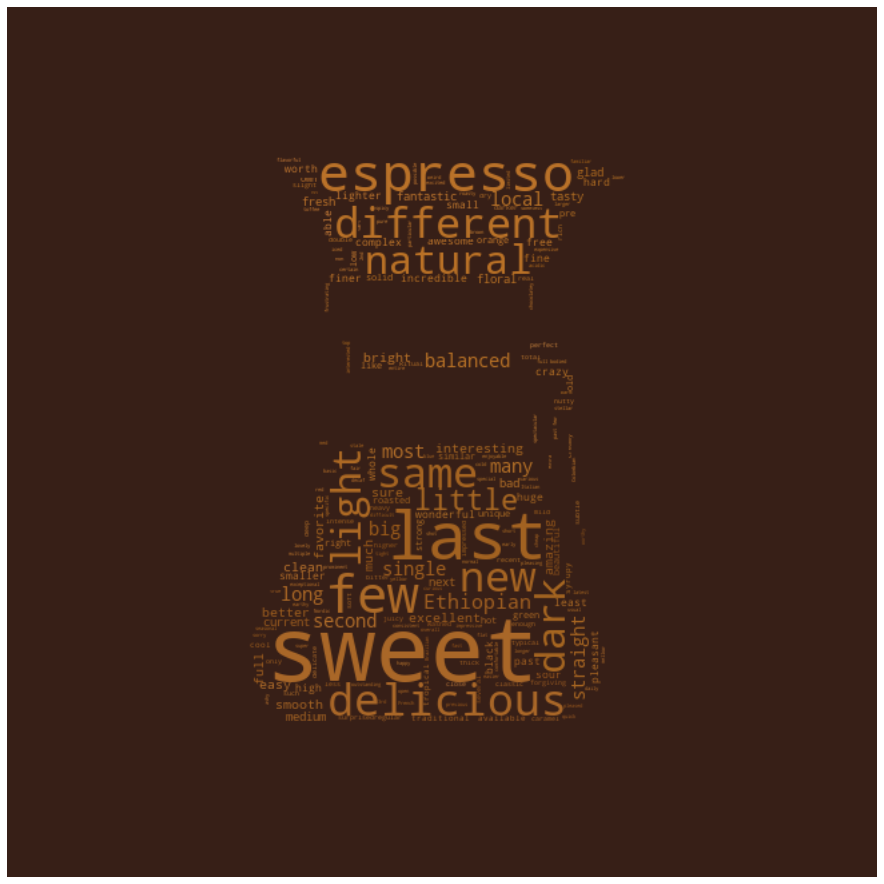

In [219]:
m1 = np.array(Image.open("assets/coffee4.jpg"))
m2 = np.array(Image.open("assets/chemex.png"))
colors = ImageColorGenerator(m1)
wc = WordCloud(background_color="#371f17", 
               mode="RGBA", 
               stopwords=stopwords,
               max_words=5000,
               mask=m2,
               width=2000,
               height=2000).generate(" ".join(adjs))
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=colors), interpolation='bilinear')
plt.axis("off")
plt.savefig("assets/results.png")

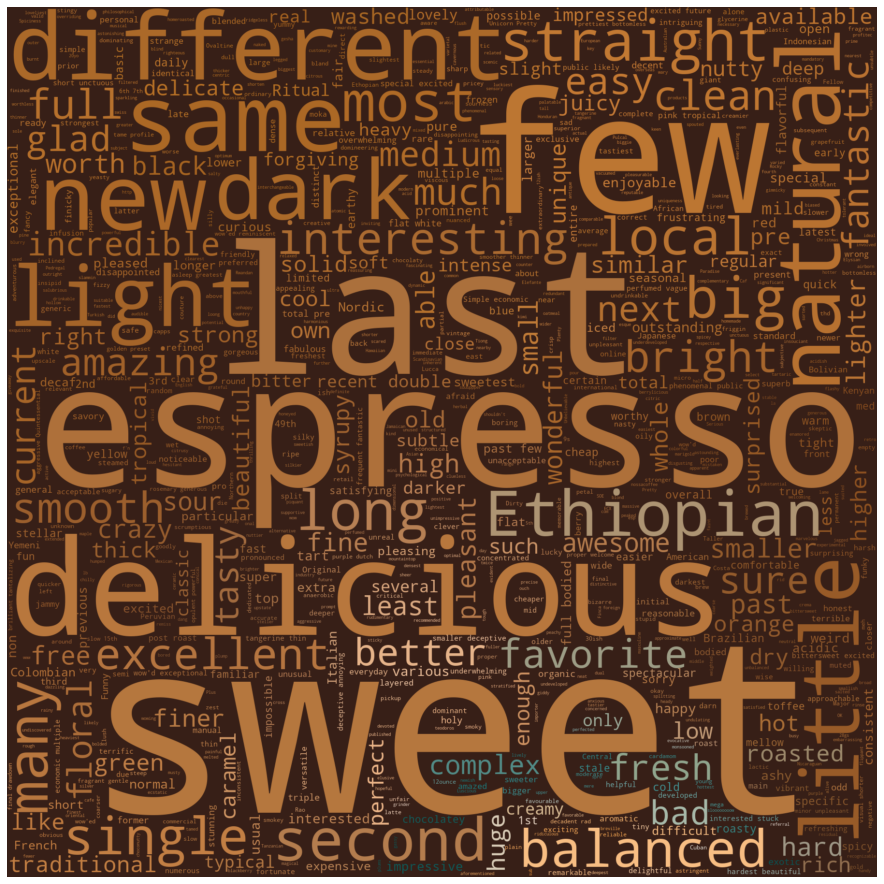

In [149]:
m1 = np.array(Image.open("assets/coffee4.jpg"))
m2 = np.array(Image.open("assets/espresso.png"))
colors = ImageColorGenerator(m1)
wc = WordCloud(background_color="#371f17", 
               mode="RGBA", 
               stopwords=stopwords,
               max_words=5000,
               mask=m2,
               width=2000,
               height=2000).generate(" ".join(adjs))
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=colors), interpolation='bilinear')
plt.axis("off")
plt.savefig("assets/results_2.png")

In [ ]:
assets/